## Homework 5

In this notebook we will write about our solution for homework number 5.

In [1]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import nltk
from matplotlib import pyplot as plt
import networkx as nx
import community
from nltk.corpus import stopwords
%matplotlib inline

Importing the data

In [2]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')

Taking a look at the data.

In [3]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


Let's take a look at the raw text from one e-mail. By looking throught the extracted body text we find that for a lot of emails it was not possible to extract only the body.

In [4]:
emails.ExtractedBodyText.loc[7939]

"B6\nI assume you saw this by now -- if not, it's worth a read.\nForwarded message"

But we can also see that there are not a lot of email where we have no text.

In [5]:
numNans = emails.ExtractedBodyText.isnull().sum()
print('No extracted body text in ',numNans/len(emails)*100,' %')

No extracted body text in  15.1415984896  %


We will write the text into a text file so that we do can easily use the wordcloud function.

In [155]:
textFile = open('bodyText.txt','w')

for i in range(1,len(emails)):
    textFile.write(str(emails.ExtractedSubject.values[i]))
    textFile.write(' ')
    textFile.write(str(emails.ExtractedBodyText.values[i]))
    
textFile.close()

Word cloud generation:

In [156]:
text = open('bodyText.txt','r').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

And showing the first wordcloud.

(-0.5, 399.5, 199.5, -0.5)

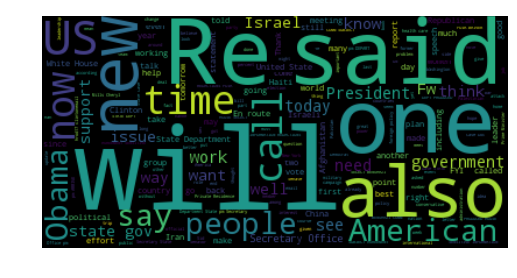

In [8]:
plt.imshow(wordcloud)
plt.axis("off")

We first see that adding the subject line to the text corpus changes the data as the "Re" is present a lot and takes a lot of space in the word cloud.

Now that we have the first word cloud, we will use nltk to generate the second one. The first step is to proceed with a tokenization of words.

In [158]:
tokens = nltk.word_tokenize(text)

# Transforming the data in a NLTK text type
text_nltk = nltk.Text(tokens)

After that we follow by removing stopwords from the text. To do so we use the stopwords corpus from nltk that we update with some expressions that are not integrated standardly. We simply create a list of words that do not contain words of the stop_words set.

In [159]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']',
                   'Re','Fwd'',{', '}', '<', '>', '...', '-', 'n\'t']) # remove it if you need punctuation

words_without_stop = [i.lower() for i in text_nltk if i.lower() not in stop_words]

Here we can see the first words of the whole list:

In [11]:
words_without_stop[10:15]

['syria', 'aiding', 'qaddafi', 'sid', 'hrc']

Then we perform stemming on this list using a stemmer from the nltk module. There are multiple stemmers that can be used and the choice usually depends on the application we have in mind. Here we used the Snowball stemmer.

In [12]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english") #initialization of the stemmer

words_stemmed = [stemmer.stem(t) for t in words_without_stop] # run the stemmer on each words of our list

In order to make a wordcloud we need to convert the list of words back to a string. We do so by using the .join function that join sequence of strings.

In [13]:
s = ' '; # separator for the conversion from list to string

text_final = s.join(words_stemmed)

Then again we generate a wordcloud and plot it.

In [14]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text_final)

(-0.5, 399.5, 199.5, -0.5)

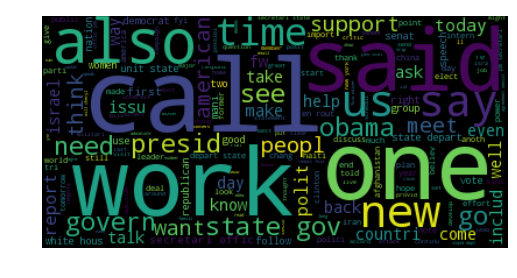

In [15]:
plt.imshow(wordcloud)
plt.axis("off")

We can see that the wordcloud is a lot different than with the previously non-processed text. There is no irrelevant stopwords highlighted. The words that are put in importance are more the central meaning of the e-mails content than before. We can also observe that some word have been shortened due to stemming which can feel odd (hous, presid, etc). This is one inconvenience of the stemming. We can see that is not perfect also in the fact that gov and govern have not been merged.

# Part two

Now we will work on sentiment analysis related to the country from wich the e-mail are linked. We start by assigning a country to each e-mail. We do this by searching in each e-mail if a there is the mention of a country (name of country code). The first country mentioned will be considered as the country of the mail. This is a little bit rudimentary but should still provide relatively good results. If there is no mention of a country, then the mail is labbelled as "no country related".

In [7]:
emailsClean = emails.dropna(subset = ['ExtractedBodyText'])

We create a mapping of country name and country code. We lower the case of the country code because we will use them as lowercase after.

In [8]:
import pycountry

mapping = {country.alpha_2.lower(): country.name for country in pycountry.countries}
dict(list(mapping.items())[10:15])

{'bz': 'Belize',
 'fk': 'Falkland Islands (Malvinas)',
 'gg': 'Guernsey',
 'nu': 'Niue',
 'sv': 'El Salvador'}

Now we create a liste of country name and a list of country code from pycountry

In [9]:
country_names = [x.name.lower() for x in pycountry.countries]
country_codes = [x.alpha_2.lower() for x in pycountry.countries]

Then we create a list that will contain the name of the country for each e-mail. We do that by iterating trough each e-mail body text and looking for corresponding country name or country code. This is done in two step. First we try to find country name correspondance, then if doesn't work we look for country name. If there is a country code we fill the list with the corresponding country name trough the mapping.

In [10]:
list_countries_email = [] # list of country name to be filled

for i in range(0,len(emailsClean)):
    #We begin by putting the text in lower case as the country codes are also in lowercase
    email_tokens = nltk.word_tokenize(str(emailsClean.ExtractedBodyText.values[i]).lower())
    
    country = list(set(email_tokens) & set(country_names))
    
    if not country:
        country = list(set(email_tokens) & set(country_codes)) # second try with the code of the country this time
        if not country:
            list_countries_email.append('no country related')
        else:
            country_map = mapping[country[0]] # here we map the first country code of the list to the country name
            list_countries_email.append(country_map)
    else:
        list_countries_email.append(country[0])

First we see that we miss 37% of e-mails due to not finding a country in them. It's possible that 37% of e-mails do not speak about countries.

In [11]:
print('Percentage of e-mails for which we do not have a country :',
      list_countries_email.count('no country related')/len(list_countries_email)*100)

Percentage of e-mails for which we do not have a country : 26.920795016315637


In [12]:
list_countries_email[:10]

['libya',
 'no country related',
 'libya',
 'Saint Pierre and Miquelon',
 'libya',
 'no country related',
 'libya',
 'no country related',
 'libya',
 'no country related']

Now that we have a country for each email, we will create a new column in emails so that we store it with the text.

In [25]:
emailsClean['Country'] = list_countries_email

#For the sentiment analysis we can drop the e-mails for which we have no country, because we are not interested in them
emailsCountry = emailsClean[emailsClean.Country.isin(['no country related'])==False]

/Users/thomasvetterli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Now we start working on sentiment analysis. We will again iterate trough each email body text. We perform sentiment analysis for each body text using the **demo_liu_hu_lexicon** method from **sentiment.util.demo** module. This method only count the number of good words and bad words and make a summation to obtain a label (Positive, negative or neutral). We store this results in a list as before.

In [13]:
from nltk.sentiment.util import *

/Users/thomasvetterli/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


And now we do the sentiment analysis.

As the computation takes some time, the results are saved in the file **emails_vader.csv** for the vader_analyser and **emailswith_liu_hu.csv**.

#### Vader Sentiment Analysis

In [ ]:
sentiment_vader = [] # list of result of the sentiment analysis for each email

from nltk.sentiment import SentimentIntensityAnalyzer

vader_analyser  = SentimentIntensityAnalyzer()
##### Warning, the code take a long time to finish. Maybe we need to remove the nan body text to ease the computation
for i in range(1,len(emailsCountry)):
    score = vader_analyser.polarity_scores(str(emailsCountry.ExtractedBodyText.values[i]))
    score.pop('compound')

    opinion = max(score,key=score.get)
    if opinion == 'pos':
        sentiment_vader.append(1)
    elif opinion == 'neg':
        sentiment_vader.append(-1)
    else:
        sentiment_vader.append(0)      

And we save the output

In [ ]:
emailsCountry['SentimentVader'] = sentiment_vader
emailsCountry.to_csv('emails_vader.csv')

### Liu Hu Sentiment Analysis

In [29]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank

def liu_hu(text):
    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(text)]

    x = list(range(len(tokenized_sent))) # x axis for the plot
    y = []

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral

    if pos_words > neg_words:
        return 1
    elif pos_words < neg_words:
        return -1
    elif pos_words == neg_words:
        return 0

And we save the outpue

In [ ]:
emailsCountry['Opinion Liu Hu'] = opinion_liu_hu
emailsCountry.to_csv('emailswith_liu_hu')

Now let's extract the sentiments from the outer csv file.

In [25]:
Sentiment_liu_hu = pd.read_csv('emailswith_liu_hu.csv',usecols=['Country','Opinion Liu Hu'])
Sentiment_Vader = pd.read_csv('emails_vader.csv',usecols=['Country','SentimentVader'])

Let's first take a look at how many of each type of sentiment we have (1 = Positive, 0 = Neutral, -1 = Negative)

In [28]:
print('Sentiments with Liu Hu :','\n',Sentiment_liu_hu['Opinion Liu Hu'].value_counts())
print('Sentiments with Vader','\n', Sentiment_Vader.SentimentVader.value_counts())

Sentiments with Liu Hu : 
  0    2569
 1    1758
-1     600
Name: Opinion Liu Hu, dtype: int64
Sentiments with Vader 
  0    4836
 1      85
-1       6
Name: SentimentVader, dtype: int64


We can see that Liu Hu analysis provides much more positive and negative values, let's see what that gives in a plot.

In our opinion, only summing the number of positive and negative values will not provide a very nice insight into the positiveness of a certain country.

The first step will be to remove the countries for which there are not a lot of messages, as they will not provide a lot of information.

We do this in one step, where we calculate the mean and the number of occurences of each country.

In [87]:
countriesLiu = Sentiment_liu_hu.groupby('Country')
totSentLiu = countriesLiu['Opinion Liu Hu'].agg(['mean', 'count'])
totSentLiu.head()

,mean,count
Country,,
Afghanistan,0.000000,1
Albania,0.142857,7
American Samoa,0.296296,162
Armenia,0.144981,538
Austria,0.099099,111


Now we sort and remove the countries that are mentionned less than 100 times in the dataset.

In [88]:
totSentLiu = totSentLiu[totSentLiu['count'] > 70].sort_values('mean',ascending=False)
totSentLiu.head()

,mean,count
Country,,
Tonga,0.330256,1950
afghanistan,0.320513,78
American Samoa,0.296296,162
haiti,0.276316,76
Iceland,0.220779,231


Now we will plot this.

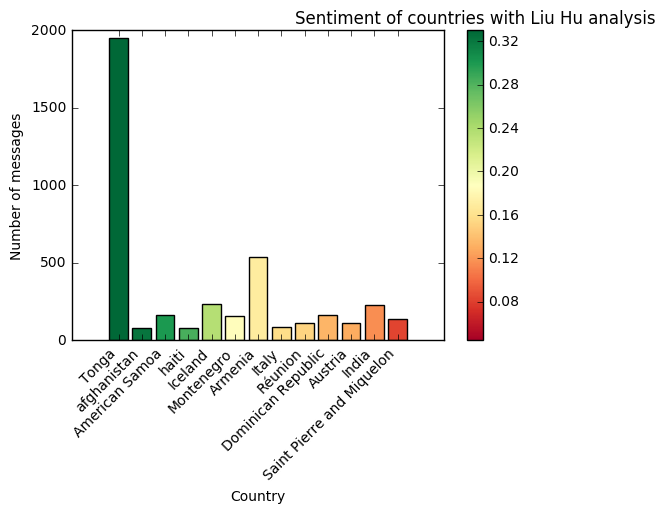

In [90]:
from matplotlib import cm

# Set up colors : red to green
y = np.array(totSentLiu['mean'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment of countries with Liu Hu analysis")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(totSentLiu.shape[0]), totSentLiu['count'], align='center', tick_label=totSentLiu.index, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Number of messages")
plt.show()

The first thing that we see in this graph is that Tonga is over represented in our dataset, which could be due to an error in our pipeline. We also see that Afghanistan has a good sentiment score, which we did not expect.

Let's plot the same for vader, there will be less countries as a lot of mails have not been classified other than neutral.

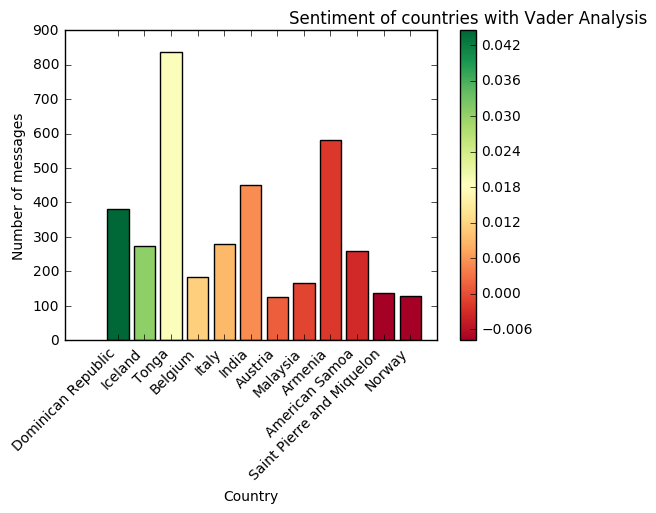

In [102]:
countriesVader = Sentiment_Vader.groupby('Country')
totSentVader = countriesVader['SentimentVader'].agg(['mean', 'count']).sort_values('mean',ascending=False)
totSentVader = totSentVader[totSentVader['count'] >120]

# Set up colors : red to green
y = np.array(totSentVader['mean'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment of countries with Vader Analysis")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(totSentVader.shape[0]), totSentVader['count'], align='center', tick_label=totSentVader.index, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Number of messages")
plt.show()

We see that sentiment for countries differ with both methods!

# Part three

Now we will analyse the topics of the whole corpus using the topic modelling library Gensim.

We start by importing the necessary libraries

In [3]:
from gensim.models.ldamodel import LdaModel
from gensim import corpora
import re

//anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In order to use the Latent dirichlet alocation of the Gensim library, we need to convert our documents into a proper corpora format (See Gensim documentation). This is done in subsequent steps.

First, we simply extract the body of each emails (here we don't use the subjet as we think it will not influence the topics modelling) and we also remove numbers from each body text. This is a choice of our side and it could have been done differently. We consider that numbers should not be part of a modelled topic. But this remove the possibility of having the date in a topic for example (We actually runned it with numbers on and got 2010 in one of our topic). We also remove the body text that are 'NaN'

In [4]:
documents = []
for i in range(1,len(emails)):
    #We use the re library to remove numbers from the body of the text
    documents.append(re.sub(r'\d+', '', str(emails.ExtractedBodyText.values[i])))

In [5]:
emailsClean = emails.dropna(subset = ['ExtractedBodyText'])

After that, we perform a bit of word processing and we format the documents composed of each email body text into a suitable corpus format of Gensim. 

In [37]:
# remove common words and tokenize
stoplist = set(stopwords.words('english'))
stoplist.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']',
                   'Re','Fwd'',{', '}', '<', '>', '...', '-', 'n\'t', '•',
                 '—','%', '--'])
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

Now that we have the right format we train our model with it. We need to link the ldaModel with a mapping so that it understand correctly the corpus format. It is a mapping from word ids (integers) to words (strings). This is done with the parameter id2word.

In [25]:
# Here we set the vocabulary of the LdaModel
id2word = dictionary

We need to specify the number of topic that we want the model to output. This is an arbitrary choice. This value will be changed later to see the change in the results

In [26]:
lda = LdaModel(corpus, num_topics=5, id2word=id2word)  # train model

Finally we can print the results. Each topic is represented by a number of words which is chosen arbitrarily in the parameters of the lda model. Here, we decided to represent a topic with 10 words (We believe 10 words is enough to represent a topic).

The following results show 5 topics represented with 10 words each.

In [27]:
# This show all the topics modeled with 10 words for each representation
lda.print_topics(-1, 10)

[(0,
  '0.019*"pm" + 0.012*"b" + 0.010*"h" + 0.009*"re:" + 0.006*"state" + 0.005*"cheryl" + 0.005*"fw:" + 0.004*"huma" + 0.004*"mills," + 0.004*"sullivan,"'),
 (1,
  '0.007*"fyi" + 0.006*"see" + 0.006*"get" + 0.006*"call" + 0.005*"would" + 0.004*"know" + 0.004*"think" + 0.004*"also" + 0.003*"want" + 0.003*"secretary"'),
 (2,
  '0.021*"nan" + 0.005*"would" + 0.004*"one" + 0.003*"state" + 0.003*"u.s." + 0.003*"said" + 0.003*"tea" + 0.003*"obama" + 0.003*"first" + 0.003*"american"'),
 (3,
  '0.022*"pm" + 0.016*"office" + 0.011*"secretary\'s" + 0.008*"meeting" + 0.005*"private" + 0.005*"state" + 0.005*"route" + 0.005*"time" + 0.004*"room" + 0.004*"arrive"'),
 (4,
  '0.006*"would" + 0.005*"new" + 0.004*"obama" + 0.004*"one" + 0.003*"president" + 0.003*"like" + 0.003*"people" + 0.003*"political" + 0.003*"american" + 0.003*"also"')]

We observe that not all topics seems relevant. The topic number 3 (from 0 to 4) is quite meaningful, with words that are related. "secretary, office, state, meeting, private etc". But the majority of topics seems a little rubish.

We can see the change that occurs when we change the number of topic to be modeled and look for an otimal number that will best model the topics of the emails.

Now we try to model 10 topics

In [28]:
lda = LdaModel(corpus, num_topics=10, id2word=id2word)  # train model


In [29]:
lda.print_topics(-1, 10)

[(0,
  '0.007*"would" + 0.005*"one" + 0.004*"obama" + 0.004*"republican" + 0.004*"said" + 0.003*"president" + 0.003*"percent" + 0.003*""the" + 0.003*"new" + 0.003*"news"'),
 (1,
  '0.046*"fyi" + 0.004*"china\'s" + 0.004*"no." + 0.003*"do." + 0.003*"state" + 0.003*"u.s." + 0.003*"finds" + 0.003*"it." + 0.003*"koch" + 0.003*"//"'),
 (2,
  '0.006*"nuclear" + 0.005*"state" + 0.005*"clinton" + 0.005*"new" + 0.004*"said" + 0.004*"american" + 0.004*"secretary" + 0.004*"also" + 0.004*"white" + 0.003*"israeli"'),
 (3,
  '0.007*"would" + 0.005*"new" + 0.004*"one" + 0.004*"party" + 0.004*"u.s." + 0.004*"president" + 0.003*"obama" + 0.003*"like" + 0.003*"government" + 0.003*"also"'),
 (4,
  '0.005*"call" + 0.005*"would" + 0.004*"women" + 0.004*"work" + 0.004*"us" + 0.003*"united" + 0.003*"know" + 0.003*"new" + 0.003*"get" + 0.003*"security"'),
 (5,
  '0.013*"pm" + 0.008*"state" + 0.007*"get" + 0.006*"lona" + 0.006*"i\'m" + 0.005*"assistant" + 0.005*"secretary" + 0.005*"office" + 0.004*"valmoro" + 

It seems that the words that represent each topic are affined a little and more precise for 10 topics.

We can see that the topic number 7 would be the representant of the topic number 4 of our previous modelling, with approximately the same words but more precise.

More topics seems to make sense. Topic number 3, for exemple, probably represent a topic about obama presidency.



Now we try with 25 topics

In [30]:
lda = LdaModel(corpus, num_topics=25, id2word=id2word)  # train model


In [31]:
lda.print_topics(-1, 10)

[(0,
  '0.008*"see" + 0.007*"--" + 0.007*"would" + 0.007*"draft" + 0.006*"nuclear" + 0.006*"like" + 0.006*"speech" + 0.005*"note" + 0.005*"w" + 0.004*"fyi."'),
 (1,
  '0.006*"would" + 0.005*"tea" + 0.004*"mayor" + 0.003*"think" + 0.003*"another" + 0.003*"joe" + 0.003*"jewish" + 0.003*"could" + 0.003*"new" + 0.003*"frank"'),
 (2,
  '0.009*"agree" + 0.009*"called" + 0.007*"talk" + 0.006*"china" + 0.005*"interested" + 0.005*"wants" + 0.005*"discuss" + 0.005*"would" + 0.005*"jack" + 0.005*"phil"'),
 (3,
  '0.015*"re:" + 0.014*"beck" + 0.014*"h" + 0.012*"i\'m" + 0.011*"would" + 0.008*"call" + 0.007*"read" + 0.007*"see" + 0.007*"talk" + 0.007*"saturday,"'),
 (4,
  '0.009*"refused" + 0.007*"pm" + 0.005*"rep" + 0.005*"<hrod@clintonemail.com>" + 0.005*"house," + 0.005*"may" + 0.005*"company" + 0.005*"h" + 0.005*"got" + 0.005*"white"'),
 (5,
  '0.011*"party" + 0.010*"call" + 0.009*"see" + 0.008*"get" + 0.007*".(d)" + 0.007*"would" + 0.006*"good" + 0.006*"want" + 0.006*"u" + 0.006*"know"'),
 (6,


As before, we can observe that the words used in each topic are less general and more precise with a bigger number of topics. This seems coherent because when we increase the number of topics you have less pressure on words to be selected for a specific topic and it can thus contain less used word.

Notice that the topic number 9 still represent the same topic as in our previous model (topic 4 and 7 previously). This means that this topic is strongly represented in the corpus.

Now we will try 50 topics to see if it is relevant.

In [42]:
lda = LdaModel(corpus, num_topics=50, id2word=id2word)  # train model


In [43]:
lda.print_topics(-1, 10)

[(0,
  '0.018*"excluded" + 0.016*"unfortunately" + 0.012*"associate," + 0.010*"europe" + 0.009*"ken" + 0.008*"gowns" + 0.007*"harold" + 0.006*"french" + 0.006*"problem." + 0.006*"min."'),
 (1,
  '0.020*"i\'m" + 0.015*"blue" + 0.011*"would" + 0.011*"day." + 0.011*"read" + 0.010*"place." + 0.009*"it?" + 0.008*"know" + 0.008*"forwarding" + 0.008*"implementing"'),
 (2,
  '0.014*"mass" + 0.014*"scheduling" + 0.013*"mindful" + 0.011*"would" + 0.011*"drama" + 0.009*"hostages" + 0.008*"book." + 0.007*"do?" + 0.007*"place." + 0.007*"get"'),
 (3,
  '0.039*"embassies" + 0.022*"brief" + 0.020*"press" + 0.015*"hillary" + 0.013*"for:" + 0.011*".doc;" + 0.011*"doug" + 0.009*"none." + 0.008*"jobs," + 0.008*"back?"'),
 (4,
  '0.007*"would" + 0.006*"new" + 0.005*"obama" + 0.005*"american" + 0.005*"one" + 0.004*"also" + 0.004*"president" + 0.004*"people" + 0.003*"political" + 0.003*"government"'),
 (5,
  '0.014*".(b)," + 0.010*"mandarin" + 0.009*"blair" + 0.009*"would" + 0.008*"//" + 0.007*"conflicts." +

We can see that there are topics that make sense but a lot doesn't strike us with a meaningful subject. From our test we chosen the 25 topics to be a good approximation of the topics of the mails corpus. With this number almost all topics make relatively sense and can be understood. Also there is link with word list of the community (See bonus part after). Some topics appearing in the corpus will be the topic discutted in specific community. Such as the recurrent topic 4, 7, 9 in the 3 first model wich is related to community 8 or the obama presidency topic which is related to community 6.

## Part 4 - Graph analysis

For the graph analysis, we will first begin by taking each e-mail author, which will represent each node of the graph.

**SenderPersonId** from Emails.csv will give us the ID of the person that sent the e-mail, and by linking the e-mail ID of Emails.csv to **EmailsReceivers.csv** we can find the id of the person that received the email, and therefore create a link between these two.

We begin by creating one node per alias:

In [104]:
senders = pd.read_csv('hillary-clinton-emails/Aliases.csv')
senders.head()

,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2
2,3,ap,3
3,4,asuncion,4
4,5,alec,5


As we do not need the aliases, we just keep the ID.

In [105]:
personId = senders.PersonId.values

#Creating a graph
graph = nx.Graph()

Then we can add all the person ID's as nodes.

In [106]:
graph.add_nodes_from(personId)

Now we go into the other csv to draw the links.

In [107]:
receiverdf = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')
#We keep only the EmailID and PersonId
receiverID = receiverdf[['EmailId','PersonId']]
receiverID.head()

,EmailId,PersonId
0,1,80
1,2,80
2,3,228
3,3,80
4,4,80


Now we go into the **Emails.csv** to find the link between emailId, receiver and sender,

In [108]:
senderdf = pd.read_csv('hillary-clinton-emails/Emails.csv')
senderID = senderdf[['Id','SenderPersonId']]

#As there are a few NaN's we drop these columns
senderID  = senderID.dropna()

#We need to put the ID's in int otherwise we will not be able to build the graph
senderID = senderID.astype(int)
senderID.head()

,Id,SenderPersonId
0,1,87
2,3,32
3,4,32
4,5,80
5,6,80


Now we merge the two to have the links.

In [109]:
linksID = pd.merge(senderID,receiverID,left_on='Id',right_on='EmailId')

#And we keep the columns of interest in the dataframe
linksID = linksID[['SenderPersonId','PersonId']]
linksID.head()

,SenderPersonId,PersonId
0,87,80
1,32,228
2,32,80
3,32,80
4,80,81


Now that we have a dataframe with one row per link we will add these links to the graph.

In [110]:
for l in linksID.index:
    link = linksID.loc[l].values
    graph.add_edge(link[0],link[1])

Now we can visualize the graph

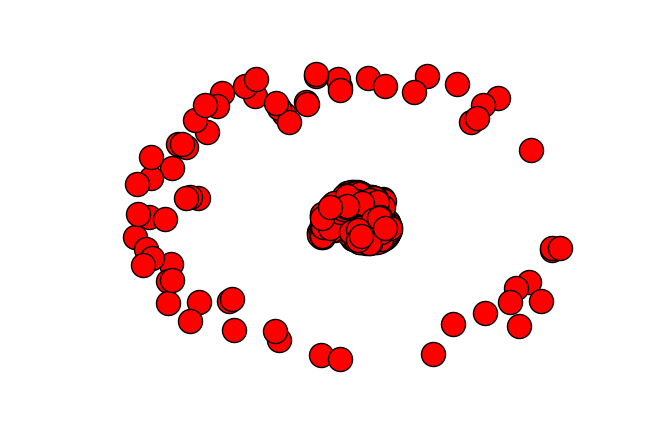

In [59]:
nx.draw(graph,pos=nx.spring_layout(graph))
plt.show()

We see that some nodes do not have neighbors (data errors). We will begin by removing them as they will not help us for our community detection.

In [111]:
for i in graph.nodes():
    if not graph.neighbors(i):
        graph.remove_node(i)

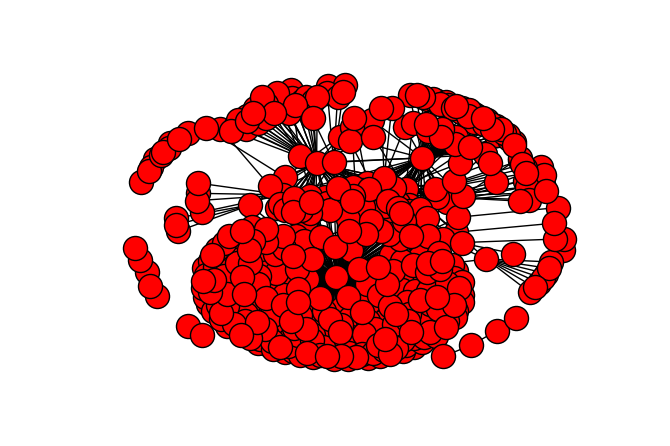

In [112]:
nx.draw(graph,pos=nx.spring_layout(graph))
plt.show()

Now that we have taken care of the nodes that do not belong to a community, we can start with the community detection.

Please note that these visulazations are only used to be sure that the data we have is useful for further analysis (i.e no nodes without edges), and we know that the do not bring a lot of information other than this one.

In [113]:
#first compute the best partition
partition = community.best_partition(graph)

And we use the example from [community detection](http://perso.crans.org/aynaud/communities/index.html) to draw the graph in communities.

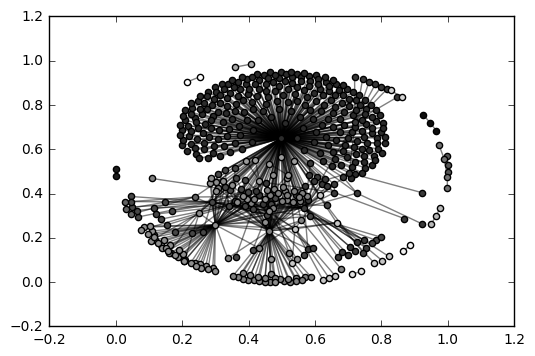

In [114]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(graph,pos, alpha=0.5)
plt.show()

We can already see the different cmunities (different shades of gray), we will know analyze them by word usage!

Now we have to add the community to the sender of each email.

In [115]:
community = []
senders = []
for i in partition.keys():
    community.append(partition[i])
    senders.append(i)

In [116]:
emailsCommunity = emails[['SenderPersonId','ExtractedBodyText']]
emailsCommunity = emailsCommunity.dropna(subset = ['ExtractedBodyText','SenderPersonId'])
emailsCommunity.SenderPersonId = emailsCommunity.SenderPersonId.astype(int)

In [117]:
emailsCommunity.head()

,SenderPersonId,ExtractedBodyText
2,32,Thx
4,80,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
5,80,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
7,80,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
8,87,FYI


In [118]:
commDF = pd.DataFrame(senders,community)
commDF['Community'] = commDF.index
commDF.columns = ['senderID','Community']

In [119]:
mailWithComm = pd.merge(emailsCommunity,commDF,left_on='SenderPersonId',right_on='senderID')
mailWithComm.head()

,SenderPersonId,ExtractedBodyText,senderID,Community
0,32,Thx,32,9
1,32,"_ .....\nFrom Randolph, Lawrence M\nSent: Wedn...",32,9
2,32,Remind me to discuss,32,9
3,32,embassy in Yemen,32,9
4,32,U.S. Department of State\nCase No. F-2015-0484...,32,9


In [152]:
textCommunity = mailWithComm.groupby('Community')['ExtractedBodyText'].apply(list)
textCommunity.head()

Community
2    [H <hrod17@clintonemail.com>\nFriday, March 11...
3    [FYI, Fyi\nB6\n— —, Fyi, This is nice., Amazin...
4    [Anne-Marie Slaughter\nSunday, March 13, 2011 ...
6    [My hair is getting whiter by the minute watch...
7    [Cc: Cheryl, Doug, Justin\nThere is a context ...
Name: ExtractedBodyText, dtype: object

Now we have a list of email for each community. What we will do is join them together, remove the stowords and then
save the 10 most common occuring words in each community.

In [210]:
mostCommon = []

#Adding stopwords so that the most frequent words work a little bit better
stop_words.update(['@','--',"''",'clintonemail.com','a','b','c','d','e','f','g','h','i','g','h','i','j','k','l',
                  'l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',"'s","``",'#','pm','%',
                  '•','e.g','u.s','-'])

for i in textCommunity.index:
    textCommNltk = nltk.word_tokenize(' '.join(textCommunity[i][:]))
    text_without_stop = [i.lower() for i in textCommNltk if i.lower() not in stop_words]
    mostF = nltk.FreqDist(text_without_stop).most_common(10)
    mostCommon.append(mostF)

And now we print the most frequent words for each community.

In [211]:
for i in range(0,len(mostCommon)):
    print('Community ',i,' ',end="")
    for j in range(0,len(mostCommon[i])):
        print(mostCommon[i][j][0],' ',end="")
    print('\n')

Community  0  call  pls  hrod17  thx  would  see  get  know  'm  also  

Community  1  state  u.s.  fyi  would  said  states  united  agreement  us  benghazi  

Community  2  women  state  said  new  would  u.s.  clinton  also  one  us  

Community  3  said  mr.  richards  women  one  new  says  years  people  place  

Community  4  un  settlements  people  haitian  work  e.g.  could  government  plan  latrines  

Community  5  call  huma  abedin  said  also  2009  state.gov  would  abedinh  want  

Community  6  obama  would  president  said  one  new  state  —  fyi  party  

Community  7  state  information  department  u.s.  house  subject  would  &  date  agreement  

Community  8  office  secretary  room  meeting  arrive  route  depart  state  department  private  

Community  9  shift  day  work  sleep  lgf  convoy  hours  time  night  days  

Community  10  steinberg  nyt  simon  book  get  read  little  brainstorm  case  away  



Community 10 clearly corresponds to talks about the New York times author and we can see topics that come out in each community, but unfortunately they do not really match LDA.